### More in-depth on `GridPlot`

In [1]:
import numpy as np
from fastplotlib.layouts import GridPlot
from fastplotlib.graphics import ImageGraphic

RFBOutputContext()


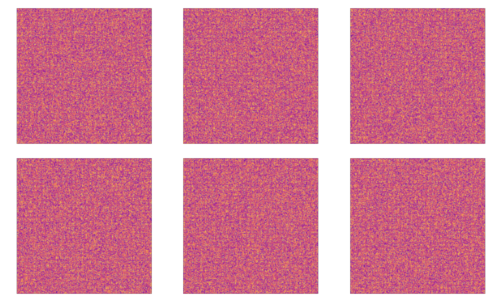

JupyterWgpuCanvas()

In [2]:
# grid with 2 rows and 3 columns
grid_shape = (2, 3)

# pan-zoom controllers for each view
# views are synced if they have the 
# same controller ID
controllers = [
    [0, 3, 1],  # id each controller with an integer
    [2, 2, 3]
]


# you can give string names for each subplot within the gridplot
names = [
    ["subplot0", "subplot1", "subplot2"],
    ["subplot3", "subplot4", "subplot5"]
]

# Create the grid plot
grid_plot = GridPlot(
    shape=grid_shape,
    controllers=controllers,
    names=names
)

image_graphics = list()

# Make a random image graphic for each subplot
for subplot in grid_plot:
    data = np.random.rand(512, 512)
    # create a ImageGraphic
    # you can also give Graphic objects names
    ig = ImageGraphic(data=data, name="image")
    subplot.add_graphic(ig)
    image_graphics.append(ig)
    

# Define a function to update the image graphics 
# with new randomly generated data
def set_random_frame():
    for ig in image_graphics:
        new_data = np.random.rand(512, 512)
        ig.update_data(data=new_data)

# add the animation
grid_plot.add_animations(set_random_frame)
grid_plot.show()

### Indexing the gridplot to access subplots

In [3]:
# can access subplot by name
grid_plot["subplot0"]

'subplot0' fastplotlib.Subplot @ 0x7f2ddd1b3d60
Graphics: 
  'image' fastplotlib.ImageGraphic @ 0x7f2ddd1b3d90

In [4]:
# can access subplot by index
grid_plot[0, 0]

'subplot0' fastplotlib.Subplot @ 0x7f2ddd1b3d60
Graphics: 
  'image' fastplotlib.ImageGraphic @ 0x7f2ddd1b3d90

## subplots also support indexing!
this can be used to get graphics if they are named

In [5]:
# can access graphic directly via name
grid_plot["subplot0"]["image"]

'image' fastplotlib.ImageGraphic @ 0x7f2ddd1b3d90

In [6]:
grid_plot["subplot0"]["image"].clim = (0.6, 0.8)

### positional indexing also works if subplots have string names

In [7]:
grid_plot[1, 0]["image"].clim = (0.1, 0.3)